In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline

In [3]:
N = 2048
FOV = 10e-3
dx = FOV/N

E0 = 14410

beam_params = {
    'photonEnergy': E0,
    'cx': 0e-6,
    'cy': 0e-6,
    'ax': 0.e-6,
    'ay': 0e-6,
    'N': N,
    'sigma_x': 15e-6,
    'sigma_y': 15e-6,
    'z0x': 70,
    'z0y': 70,
    'rangeFactor': 10,
    'scaleFactor': 5
}

In [23]:
b1 = beam.Beam(beam_params=beam_params)

mr1l0 = optics.FlatMirror('mr1l0', length=1, alpha=2.1e-3, z=740,delta=0e-9)
mr2l0 = optics.FlatMirror('mr2l0', length=1, alpha=2.1e-3, z=747.286)

crystal1 = optics.Crystal('c1', hkl=[11,5,3], length=5e-2, z=990, E0=E0,alphaAsym=78.4*np.pi/180, orientation=2)
crystal2 = optics.Crystal('c2', hkl=[11,5,3], length=5e-2, z=990.1, E0=E0,alphaAsym=78.4*np.pi/180, 
                          orientation=2)
crystal3 = optics.Crystal('c3', hkl=[11,5,3], length=5e-2, z=990.4, E0=E0,alphaAsym=78.4*np.pi/180, orientation=0,
                         asym_type='emergence')

crystal4 = optics.Crystal('c4', hkl=[11,5,3], length=5e-2, z=990.5, E0=E0,alphaAsym=78.4*np.pi/180, 
                          asym_type='emergence', orientation=0)
# crystal5 = optics.Crystal('c1', hkl=[2,2,0], length=1.5e-2, z=792, E0=9500,alphaAsym=0*np.pi/180, 
#                           orientation=0)

# print('b: %.2f' % crystal2.b)

# crl1 = optics.CRL('crlx', z=990.5, roc=7e-6)
# crl2 = optics.CRL('crly', z=990.5,orientation=1, roc=7e-6)
# slit = optics.Slit('slit', z=990.6, x_width=30e-6, y_width=100e-6)

# print(crystal.alpha*180/np.pi)
# print(crystal.beta0*180/np.pi)
print((np.sin(crystal2.beta0)/np.sin(crystal2.alpha)))
print(crystal4.alpha*180/np.pi)
# print(crystal5.alpha*180/np.pi)
print(crystal4.beta0*180/np.pi)

# Stack of 20 CRLs for tight focus
# crl_list = []
# for i in range(20):
#     crl_list.append(optics.CRL('crl%d' % i, z=800+i*1e-3,dx=0e-6, ))

# IP = optics.PPM('IP', FOV=50e-6, z=991.43, N=256)
upstream_YAG = optics.PPM('YAG1',FOV=1e-3,z=crystal1.z - 1, N=256)

YAG_mid = optics.PPM('YAG_mid',FOV=30e-3,z=990.2)

downstream_YAG = optics.PPM('YAG2',FOV=1e-3,z=crystal4.z + 6.5, N=256)
# downstream_YAG = optics.PPM('YAG', FOV=3e-3, z=803, N=256)


devices = [mr1l0,mr2l0, upstream_YAG, downstream_YAG, crystal1,crystal2,crystal3,crystal4]
# devices = devices + crl_list

XPP = beamline.Beamline(devices)

k_ix = -np.sin(crystal1.alpha)
k_iy = np.sin(0)
k_iz = np.sqrt(1 - k_ix ** 2 - k_iy ** 2)
k_i = np.array([k_ix,k_iy,k_iz])

crystal1.rotation_crystal(k_i, b1.lambda0)

FWHM in x: 151.86758491946955 microns
FWHM in y: 151.86758491946955 microns
FWHM Divergence (x): 2.2 μrad
FWHM Divergence (y): 2.2 μrad
8.214404555481009
8.214404555481009
x is focused
y is focused
9.927980699213702
158.87993469935145
2.0799346993514485


(array([3.57966090e-05, 0.00000000e+00, 1.38451793e-05]),
 array([ 0.36074976,  0.        , -0.93266265]))

In [30]:
print(crystal3.beta0*180/np.pi)
.36*180/np.pi

2.0799346993514485


20.626480624709636

mr1l0
zx: 70.00
zy: 70.00
drift1
zx: 77.29
zy: 77.29
mr2l0
zx: 77.29
zy: 77.29
drift2
x becomes unfocused
y becomes unfocused
zx: 319.00
zy: 319.00
YAG1
zx: 319.00
zy: 319.00
drift3
zx: 320.00
zy: 320.00
c1
f: -31540.74
zx: 3184.88
zy: 320.00
drift4
zx: 3184.98
zy: 320.10
c2
f: -313927.21
zx: 31699.37
zy: 320.10
drift5
zx: 31699.67
zy: 320.40
c3
f: -321.61
zx: 2703.21
zy: 320.40
drift6
zx: 2703.31
zy: 320.50
c4
f: -27.43
zx: 230.53
zy: 320.50
drift7
zx: 237.03
zy: 327.00
YAG2
zx: 237.03
zy: 327.00


<IPython.core.display.Javascript object>


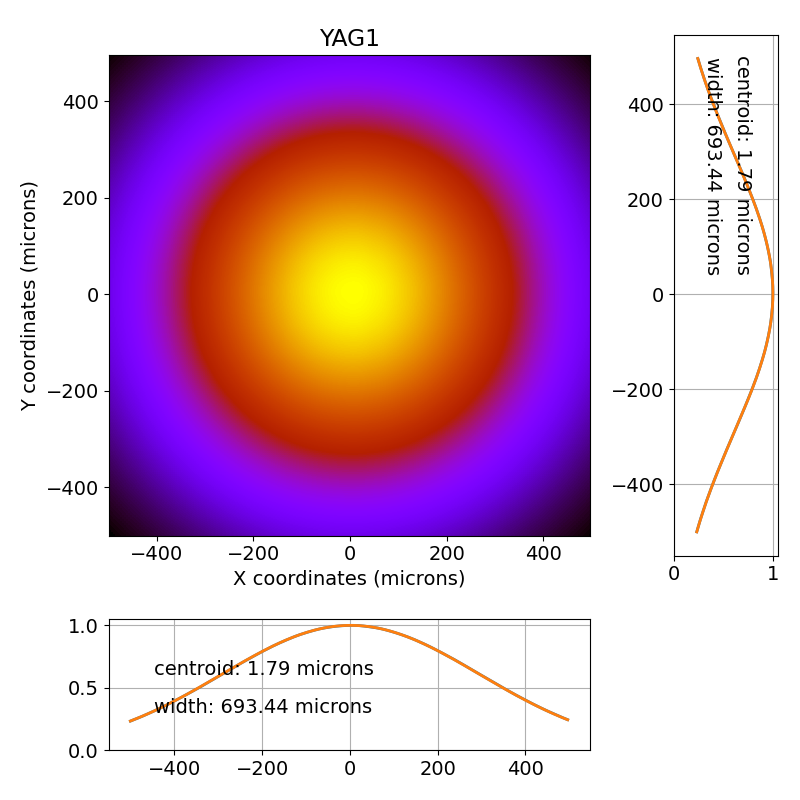

<IPython.core.display.Javascript object>


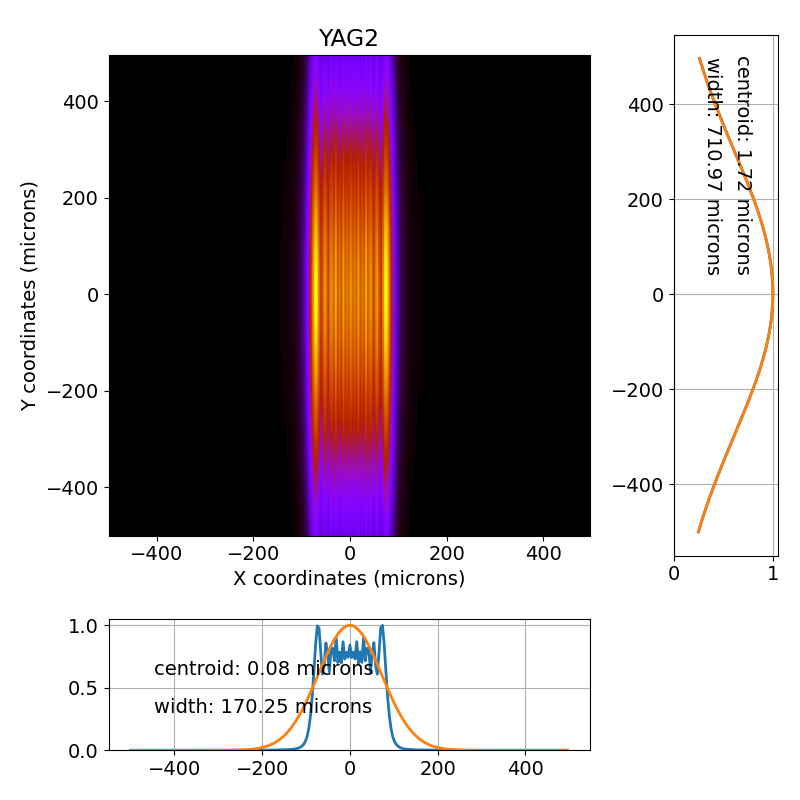

<IPython.core.display.Javascript object>


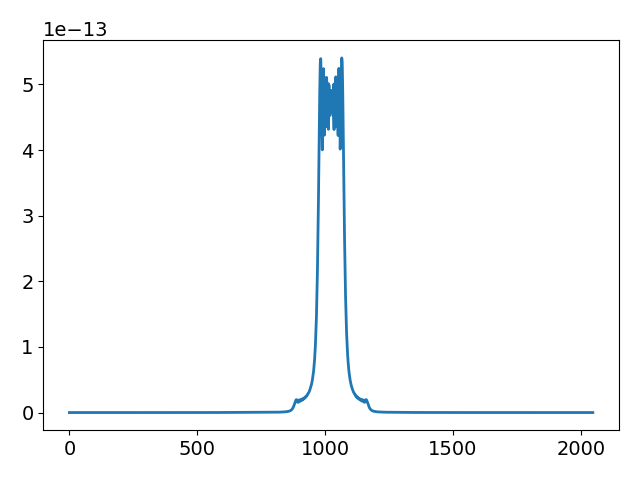

In [7]:
b2 = XPP.propagate_beamline(b1)
XPP.YAG1.view_beam()
XPP.YAG2.view_beam()
# XPP.YAG_mid.view_beam()
# XPP.IP.view_beam()
# XPP.YAG.view_beam()
plt.figure()
plt.plot(np.abs(b2.wavex))

In [20]:
beam_params['photonEnergy'] = 14410

pulse_test = beam.Pulse(beam_params=beam_params, tau=100, time_window=2000)

In [21]:
pulse_test.propagate(beamline=XPP, screen_names=['YAG1', 'YAG2'])

FWHM in x: 151.86855170388822 microns
FWHM in y: 151.86855170388822 microns
FWHM Divergence (x): 2.2 μrad
FWHM Divergence (y): 2.2 μrad
8.214351543069807
8.214351543069807
x is focused
y is focused
mr1l0
zx: 70.00
zy: 70.00
drift1
zx: 77.29
zy: 77.29
mr2l0
zx: 77.29
zy: 77.29
drift2
x becomes unfocused
y becomes unfocused
zx: 319.00
zy: 319.00
YAG1
zx: 319.00
zy: 319.00
drift3
zx: 320.00
zy: 320.00
c1
f: -31540.74
zx: 3184.16
zy: 320.00
drift4
zx: 3184.26
zy: 320.10
c2
f: -313855.54
zx: 31698.41
zy: 320.10
drift5
zx: 31698.71
zy: 320.40
c3
f: -321.60
zx: 2701.53
zy: 320.40
drift6
zx: 2701.63
zy: 320.50
c4
f: -27.41
zx: 230.24
zy: 320.50
drift7
zx: 236.74
zy: 327.00
YAG2
zx: 236.74
zy: 327.00
FWHM in x: 151.86852922038696 microns
FWHM in y: 151.86852922038696 microns
FWHM Divergence (x): 2.2 μrad
FWHM Divergence (y): 2.2 μrad
8.214352775916579
8.214352775916579
x is focused
y is focused
mr1l0
zx: 70.00
zy: 70.00
drift1
zx: 77.29
zy: 77.29
mr2l0
zx: 77.29
zy: 77.29
drift2
x becomes unfoc

f: -321.61
zx: 2702.39
zy: 320.40
drift6
zx: 2702.49
zy: 320.50
c4
f: -27.42
zx: 230.39
zy: 320.50
drift7
zx: 236.89
zy: 327.00
YAG2
zx: 236.89
zy: 327.00
FWHM in x: 151.86828190232148 microns
FWHM in y: 151.86828190232148 microns
FWHM Divergence (x): 2.2 μrad
FWHM Divergence (y): 2.2 μrad
8.214366337231073
8.214366337231073
x is focused
y is focused
mr1l0
zx: 70.00
zy: 70.00
drift1
zx: 77.29
zy: 77.29
mr2l0
zx: 77.29
zy: 77.29
drift2
x becomes unfocused
y becomes unfocused
zx: 319.00
zy: 319.00
YAG1
zx: 319.00
zy: 319.00
drift3
zx: 320.00
zy: 320.00
c1
f: -31540.74
zx: 3184.56
zy: 320.00
drift4
zx: 3184.66
zy: 320.10
c2
f: -313895.55
zx: 31698.94
zy: 320.10
drift5
zx: 31699.24
zy: 320.40
c3
f: -321.61
zx: 2702.47
zy: 320.40
drift6
zx: 2702.57
zy: 320.50
c4
f: -27.42
zx: 230.40
zy: 320.50
drift7
zx: 236.90
zy: 327.00
YAG2
zx: 236.90
zy: 327.00
FWHM in x: 151.86825941890177 microns
FWHM in y: 151.86825941890177 microns
FWHM Divergence (x): 2.2 μrad
FWHM Divergence (y): 2.2 μrad
8.214367

f: -31540.74
zx: 3184.93
zy: 320.00
drift4
zx: 3185.03
zy: 320.10
c2
f: -313932.21
zx: 31699.44
zy: 320.10
drift5
zx: 31699.74
zy: 320.40
c3
f: -321.61
zx: 2703.33
zy: 320.40
drift6
zx: 2703.43
zy: 320.50
c4
f: -27.43
zx: 230.55
zy: 320.50
drift7
zx: 237.05
zy: 327.00
YAG2
zx: 237.05
zy: 327.00
FWHM in x: 151.86801210173329 microns
FWHM in y: 151.86801210173329 microns
FWHM Divergence (x): 2.2 μrad
FWHM Divergence (y): 2.2 μrad
8.214381131392338
8.214381131392338
x is focused
y is focused
mr1l0
zx: 70.00
zy: 70.00
drift1
zx: 77.29
zy: 77.29
mr2l0
zx: 77.29
zy: 77.29
drift2
x becomes unfocused
y becomes unfocused
zx: 319.00
zy: 319.00
YAG1
zx: 319.00
zy: 319.00
drift3
zx: 320.00
zy: 320.00
c1
f: -31540.74
zx: 3184.97
zy: 320.00
drift4
zx: 3185.07
zy: 320.10
c2
f: -313935.54
zx: 31699.48
zy: 320.10
drift5
zx: 31699.78
zy: 320.40
c3
f: -321.61
zx: 2703.40
zy: 320.40
drift6
zx: 2703.50
zy: 320.50
c4
f: -27.43
zx: 230.56
zy: 320.50
drift7
zx: 237.06
zy: 327.00
YAG2
zx: 237.06
zy: 327.00
FWH

f: -31540.74
zx: 3185.34
zy: 320.00
drift4
zx: 3185.44
zy: 320.10
c2
f: -313972.20
zx: 31699.97
zy: 320.10
drift5
zx: 31700.27
zy: 320.40
c3
f: -321.62
zx: 2704.26
zy: 320.40
drift6
zx: 2704.36
zy: 320.50
c4
f: -27.44
zx: 230.71
zy: 320.50
drift7
zx: 237.21
zy: 327.00
YAG2
zx: 237.21
zy: 327.00
FWHM in x: 151.8677423021234 microns
FWHM in y: 151.8677423021234 microns
FWHM Divergence (x): 2.2 μrad
FWHM Divergence (y): 2.2 μrad
8.214395925553603
8.214395925553603
x is focused
y is focused
mr1l0
zx: 70.00
zy: 70.00
drift1
zx: 77.29
zy: 77.29
mr2l0
zx: 77.29
zy: 77.29
drift2
x becomes unfocused
y becomes unfocused
zx: 319.00
zy: 319.00
YAG1
zx: 319.00
zy: 319.00
drift3
zx: 320.00
zy: 320.00
c1
f: -31540.74
zx: 3185.37
zy: 320.00
drift4
zx: 3185.47
zy: 320.10
c2
f: -313975.54
zx: 31700.02
zy: 320.10
drift5
zx: 31700.32
zy: 320.40
c3
f: -321.62
zx: 2704.34
zy: 320.40
drift6
zx: 2704.44
zy: 320.50
c4
f: -27.44
zx: 230.72
zy: 320.50
drift7
zx: 237.22
zy: 327.00
YAG2
zx: 237.22
zy: 327.00
FWHM 

In [64]:
80/200

0.4

<IPython.core.display.Javascript object>


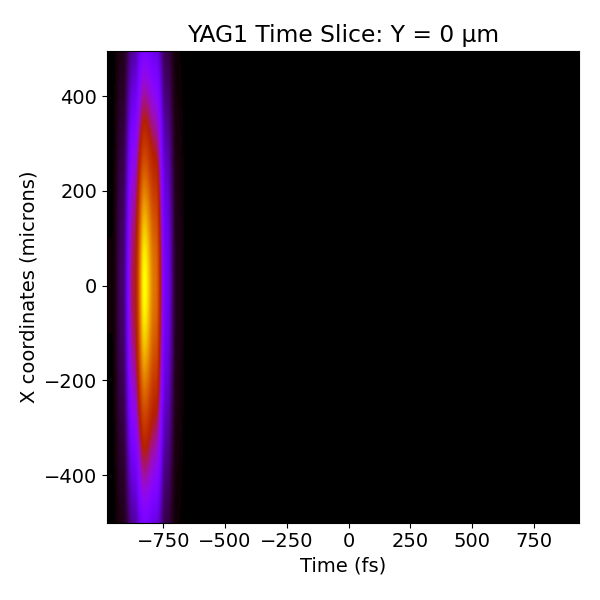

128


<IPython.core.display.Javascript object>


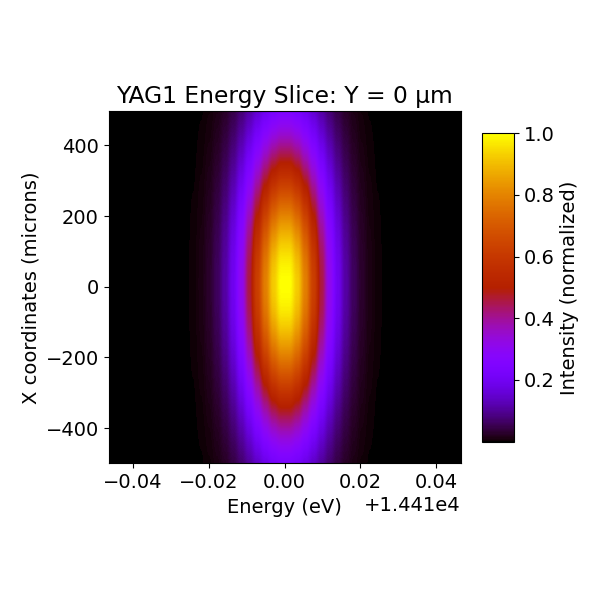

<IPython.core.display.Javascript object>


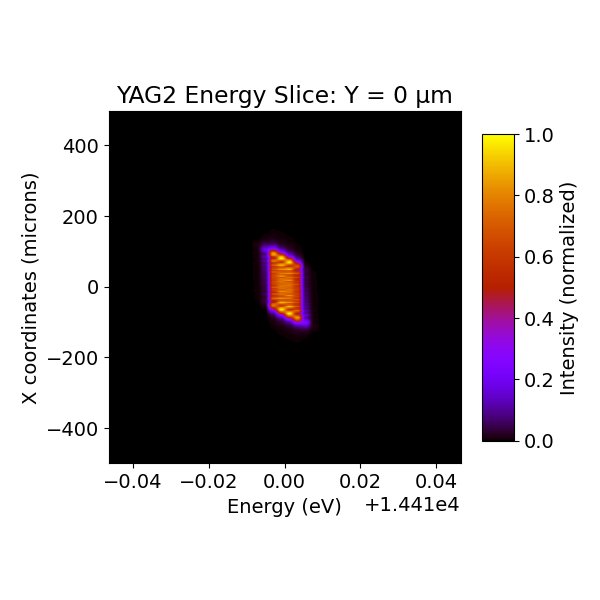

<IPython.core.display.Javascript object>


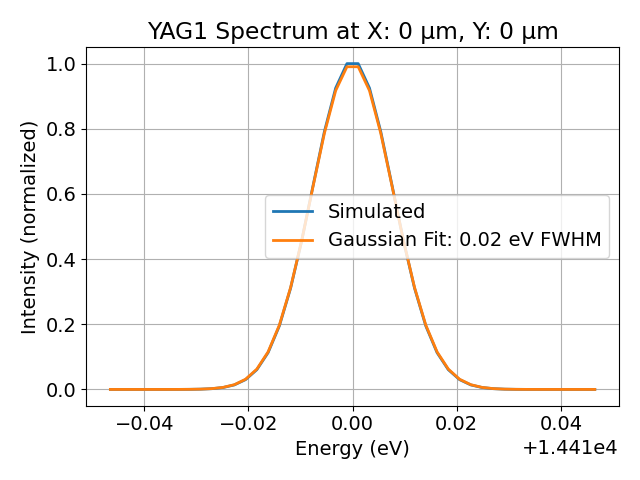

<IPython.core.display.Javascript object>


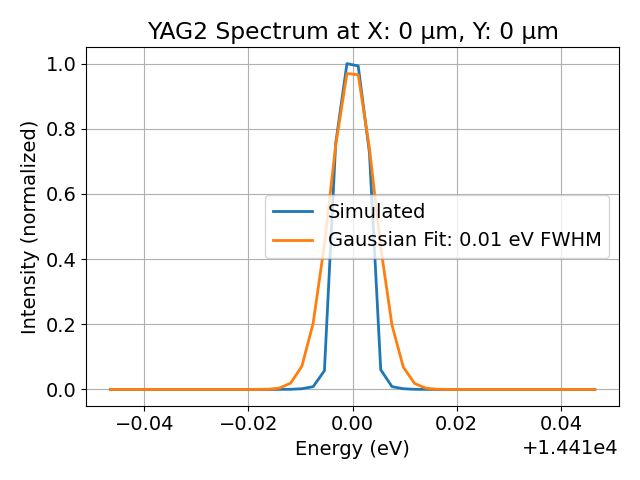

In [22]:
pulse_test.imshow_time_slice('YAG1')
pulse_test.imshow_energy_slice('YAG1')
pulse_test.imshow_energy_slice('YAG2')
pulse_test.plot_spectrum('YAG1')
pulse_test.plot_spectrum('YAG2')
# pulse_test.imshow_energy_slice('IP')
# pulse_test.imshow_projection('IP')
# pulse_test.imshow_time_slice('IP')

In [8]:
(760-343)/180

2.316666666666667

In [33]:
(430-70)/350

1.0285714285714285

In [38]:
(430-90)/300

1.1333333333333333

In [16]:
(90+170)/480

0.5416666666666666

In [21]:
(680-512)/60

2.8